## Análisis de Componentes Principales
El análisis de componentes principales (PCA) es el proceso mediante el cual se calculan los componentes principales de una matriz de datos con el objeto de realizar una comprensión de los datos. PCA es un enfoque no supervisado, lo que significa que se realiza en un conjunto de variables $X_1, X_2,…, X_d$ sin respuesta asociada $Y$. PCA reduce la dimensionalidad del conjunto de datos, lo que permite explicar la mayor parte de la variabilidad utilizando menos variables. El PCA se usa comúnmente como una primera herramienta de visualización de los datos, para reducir el número de variables y evitar la multicolinealidad, o cuando se tienen demasiados predictores en relación con el número de observaciones.

Sea $X$ una matriz de $n$ datos $d$-dimensionales, con cada componente  de media nula, i.e.

$$X = \begin{pmatrix}
x_{11} &...& x_{1d} \\
&...&\\
x_{n1}&...& x_{nd} \\
\end{pmatrix}
\quad donde \quad \bar{\bf{x}_j}=0, \quad j=1,...,d$$

Buscamos la dirección $w'=(w_1,...,w_d)$ tal que la proyección de $X$ sobre esta dirección maximice la varianza empírica de $Xw$: 

$$\max_w \hat{\sigma}^2(Xw) \quad \text{s. a} \quad \|w\|=1$$

Tenemos que:

$$\hat{\sigma}^2(Xw) =  w'X'Xw  - (\mathbb{E}(Xw))^2= w' \hat{\Sigma} w$$

donde  $\hat{\Sigma}$ es la varianza empírica de $X$:
$$\hat{\Sigma} = X'X = \begin{pmatrix}
\sum_{i=1}^n (x_{i1})^2 &...& \sum_{i=1}^n (x_{i1}x_{id}) \\
&...&\\
\sum_{i=1}^n (x_{id}x_{i1})&...& \sum_{i=1}^n (x_{id})^2  \\
\end{pmatrix}$$

Para maximizar la varianza $\hat{\sigma}^2(Xw)$, construimos el Lagrangiano:

$$L = w' \hat{\Sigma} w + \lambda (w'w-1)$$

La condición de máximo queda:

$$\frac{\partial L}{\partial w} = 2 \hat{\Sigma} w - 2\lambda w = 0 \quad \implies \quad \hat{\Sigma} w = \lambda w$$

Con lo cual $w$ es un vector propio de $\hat{\Sigma}$,  y por lo tanto

$$\hat{\sigma}^2(Xw) = w' \hat{\Sigma} w = w' (\lambda w) = \lambda$$

la dirección de máxima varianza es la dirección asociada al vector propio cuyo valor propio es máximo.
Este procedimiento puede iterarse para obtener la segunda proyección (ortogonal a la primera) de máxima varianza, que será el vector propio correspondiente al segundo mayor valor propio. Y por inducción se pueden obtener las siguientes componentes principales.

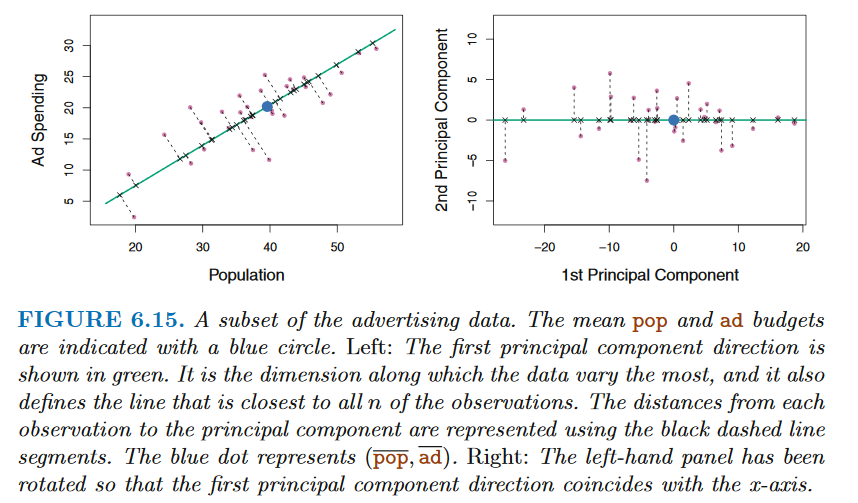

In [1]:
library("IRdisplay")
display_png(file="ejemploPCA.png",width=600)

**Referencias**:
1. Kevin Murphy (2012) "Machine Learning, a probabilistic approach", Capítulo 12. MIT Press
2. Hastie, Tibshirani and Friedman, "The elements of statistical learning" 2nd Ed., Springer, Capítulo 14
3. Ethem Alpayin (2004) "Introduction to Machine Learning", Capítulo 6, MIT Press


###### Ejercicio 1: 
Derive expresiones para demostrar que la segunda dirección (ortogonal a la primera) de máxima varianza, es el vector propio correspondiente al segundo mayor valor propio.

#### Ejemplo Ilustrativo:
Consideremos el conjunto de datos de "USArrests" que está integrado en R. Este es un conjunto de datos que contiene cuatro variables que representan el número de arrestos por cada 100.000 residentes por asalto, asesinato y violación en cada uno de los cincuenta estados de EE. UU. en el año 1973. Los datos  contienen también  el porcentaje de la población que vive en áreas urbanas, UrbanPop. 

In [2]:
data("USArrests")
head(USArrests, 10)


,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


#### Preparando los datos
Para desarrollar los algoritmos vistos es preferible que cada variable  se centre en cero y que tengan una escala común. Por ejemplo, la varianza de Asalto es 6945, mientras que la varianza de Asesinato es solo 18.97. Los datos de Asalto no son necesariamente más variables, simplemente están en una escala diferente en relación con el Asesinato.

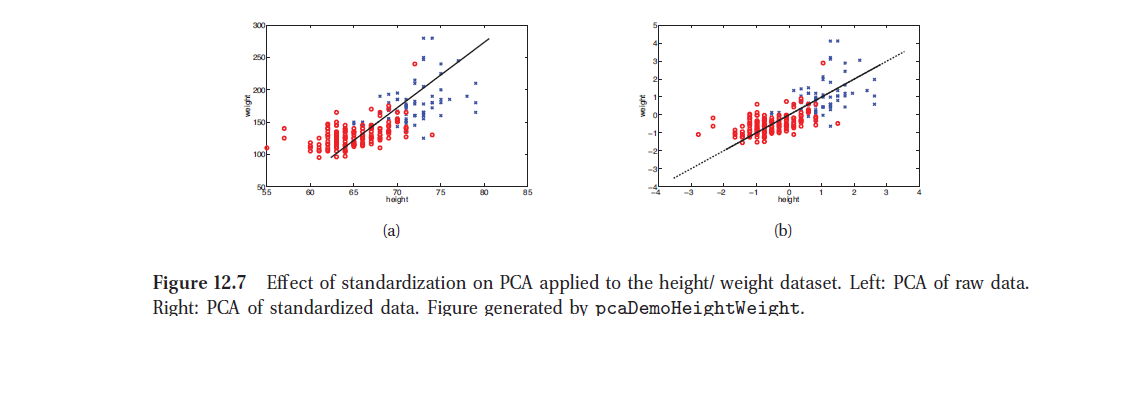

In [3]:
display_png(file="figura2.png")

In [4]:
getRversion()

[1] ‘3.6.1’

In [5]:
#análisis exploratorio de los datos

library(corrplot)

# cada variable
summary(USArrests)
boxplot(USArrests)

#relaciones entre variables
plot(USArrests)
mcor<-cor(USArrests)
print(mcor)

corrplot(mcor)



ERROR: Error in library(corrplot): there is no package called ‘corrplot’


In [6]:
# calcula varianzas para cada variable
apply(USArrests, 2, var)
apply(USArrests,2,mean)


Murder    Assault   UrbanPop       Rape 
  18.97047 6945.16571  209.51878   87.72916

Murder  Assault UrbanPop     Rape 
   7.788  170.760   65.540   21.232

Una posibilidad es estandarizar las variables:

In [7]:
# escalando los datos
scaled_df <- apply(USArrests, 2, scale)
head(scaled_df)
apply(scaled_df, 2, var)
apply(scaled_df, 2, mean)

Murder,Assault,UrbanPop,Rape
1.24256408,0.7828393,-0.5209066,-0.003416473
0.50786248,1.1068225,-1.2117642,2.484202941
0.07163341,1.4788032,0.9989801,1.042878388
0.23234938,0.2308680,-1.0735927,-0.184916602
0.27826823,1.2628144,1.7589234,2.067820292
0.02571456,0.3988593,0.8608085,1.864967207


Murder  Assault UrbanPop     Rape 
       1        1        1        1

Murder       Assault      UrbanPop          Rape 
-7.663087e-17  1.112408e-16 -4.332808e-16  8.942391e-17

Sin embargo, no siempre el escalado es  deseable. Un ejemplo sería si cada variable en el conjunto de datos tuviera las mismas unidades y el analista deseara capturar esta diferencia en la varianza para sus resultados. Dado que Asesinato, Asalto y Violación se miden según las ocurrencias por cada 100,000 personas, esto puede ser razonable dependiendo de cómo quiera interpretar los resultados. Pero como UrbanPop se mide como un porcentaje de la población total, no tendría sentido comparar la variabilidad de UrbanPop con el asesinato, el asalto y la violación.

Lo importante a recordar es que el PCA está influenciado por la magnitud de cada variable; por lo tanto, los resultados obtenidos cuando realizamos PCA también dependerán de si las variables se han escalado individualmente.

In [8]:
# Calculando valores y vectores propios de la matriz de covarianzas empírica
arrests.cov <- cov(scaled_df)
arrests.eigen <- eigen(arrests.cov)
arrests.eigen


eigen() decomposition
$values
[1] 2.4802416 0.9897652 0.3565632 0.1734301

$vectors
           [,1]       [,2]       [,3]        [,4]
[1,] -0.5358995  0.4181809 -0.3412327  0.64922780
[2,] -0.5831836  0.1879856 -0.2681484 -0.74340748
[3,] -0.2781909 -0.8728062 -0.3780158  0.13387773
[4,] -0.5434321 -0.1673186  0.8177779  0.08902432


In [9]:
# Extrayendo los pesos de los dos primeras componentes principales 
w <- -arrests.eigen$vectors[,1:2] 
row.names(w) <- c("Murder", "Assault", "UrbanPop", "Rape")
colnames(w) <- c("PC1", "PC2")
w


,PC1,PC2
Murder,0.5358995,-0.4181809
Assault,0.5831836,-0.1879856
UrbanPop,0.2781909,0.8728062
Rape,0.5434321,0.1673186


In [10]:
# Calcula proyección de los datos en cada componente principal 
PC1 <- as.matrix(scaled_df) %*% w[,1]
PC2 <- as.matrix(scaled_df) %*% w[,2]

# Crea nuevo dataframe con la proyección
PC <- data.frame(State = row.names(USArrests), PC1, PC2)
head(PC)

State,PC1,PC2
Alabama,0.9756604,-1.1220012
Alaska,1.9305379,-1.0624269
Arizona,1.7454429,0.7384595
Arkansas,-0.1399989,-1.1085423
California,2.4986128,1.5274267
Colorado,1.4993407,0.9776297


In [11]:
library(ggplot2)
# Grafico en primer plano principal
ggplot(PC, aes(PC1, PC2)) + 
  modelr::geom_ref_line(h = 0) +
  modelr::geom_ref_line(v = 0) +
  geom_text(aes(label = State), size = 3) +
  xlab("Primera Componente Principal") + 
  ylab("Segunda Componente Principal") + 
  ggtitle("Proyección en primer plano principal del los datos USArrests")

ERROR: Error in library(ggplot2): there is no package called ‘ggplot2’


#### Selección del número de componentes principales

Como ya se ha mencionado el PCA reduce la dimensionalidad al mismo tiempo que explica la mayor parte de la variabilidad, pero existe un método más técnico para medir exactamente qué porcentaje de la varianza se mantuvo en estos componentes principales.

La proporción de varianza explicada (PVE) por la m-ésima componente principal se calcula utilizando la ecuación:
$$PVE = \frac{\sum_{i=1}^n \sum_{j=1}^d (w_{jm}x_{ij})^2}{\sum_{i=1}^n \sum_{j=1}^d {x_{ij}}^2}$$

De los cálculos previos se tiene que otra manera de calcular el PVE de la m-ésima componente principal es considerando los valores propios:
$$PVE = \frac{\lambda_m}{\sum_{j=1}^d \lambda_j}$$

In [12]:
PVE <- arrests.eigen$values / sum(arrests.eigen$values)
round(PVE, 2)

[1] 0.62 0.25 0.09 0.04

La primera componente principal en el ejemplo explica el 62% de la variabilidad, y la segunda componente principal explica el 25%. Juntas, las dos primeras componentes principales explican el 87% de la variabilidad. 

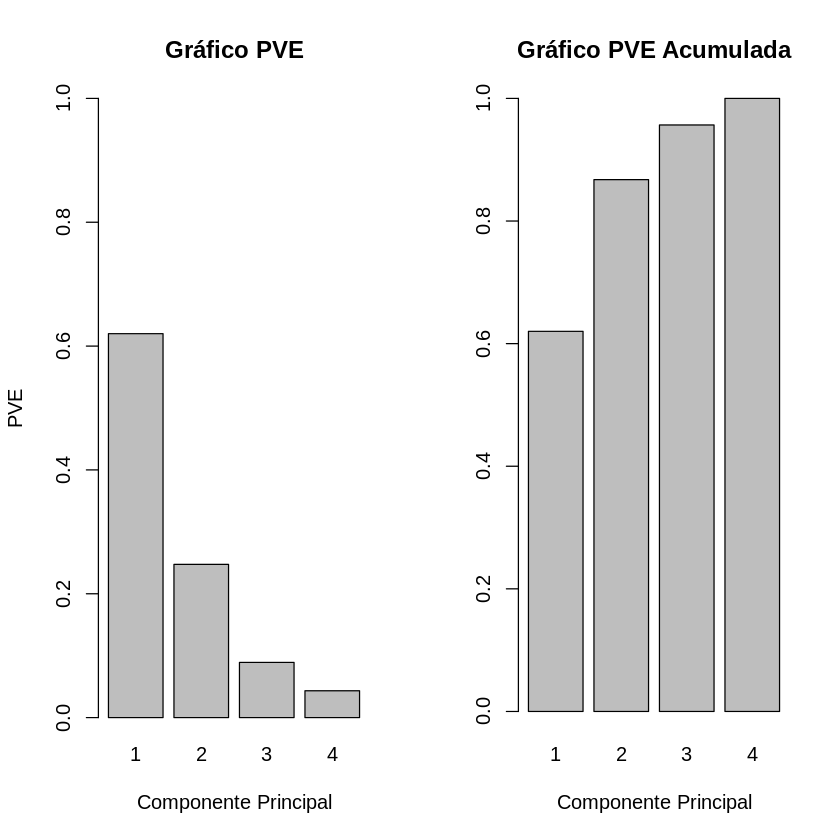

In [13]:

# Gráfico de la PVE
par(mfrow=c(1,2))
PVEplot <- barplot(PVE,xlab="Componente Principal", ylab="PVE", main= "Gráfico PVE", ylim=c(0, 1), names.arg=c(1:4))
cumPVE <- barplot(cumsum(PVE),xlab="Componente Principal", ylab="", main= "Gráfico PVE Acumulada", names.arg=c(1:4))


## Ahora con las funciones predefinidas en R

In [14]:
pca_res <- prcomp(USArrests, scale = TRUE)
names(pca_res)
pca_res$sdev
pca_res$rotation <- -pca_res$rotation
pca_res$center
pca_res$scale
pca_res$x <- -pca_res$x

[1] "sdev"     "rotation" "center"   "scale"    "x"

[1] 1.5748783 0.9948694 0.5971291 0.4164494

Murder  Assault UrbanPop     Rape 
   7.788  170.760   65.540   21.232

Murder   Assault  UrbanPop      Rape 
 4.355510 83.337661 14.474763  9.366385

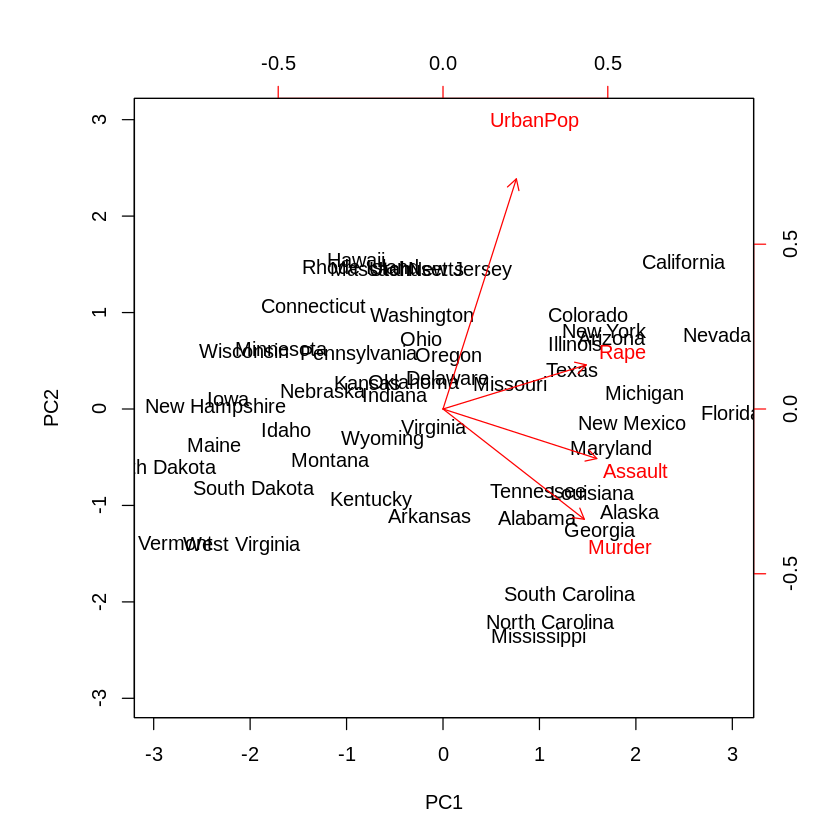

In [15]:
biplot(pca_res, scale = 0)

#### Ejercicio 2:
1. Explique como se relacionan variables y observaciones en este último gráfico. Compare los resultados obtenidos utilizando la función predefinida en R prcomp con aquellos de los cálculos previos. 
2. Explique a que corresponden cada una de las componente del objeto resultante de utilizar la función prcomp. 
3. Utilice la función predefinida en R princomp y compare con prcomp.


[1] 323  14

Region,Comuna,Poblacion..miles..2011,IDSE,Ingreso.per.cap..Mens..miles....2006.11,Pobreza...2006.11,Escolaridad..anios..2006.11,Material.Vivienda.bueno.o.acceptable...2006,Alcantarillado.o.Fosa.Spt....2006,Esperanza.vida.al.nacer..anios..2005.10,Indice.Desarrollo.Humano,Tasa.AVPP.x.1000.h.2007.11,X..defunc..50..anios.2011,Mortalidad.Infantil.x.1000.NV.2009.11
1,Iquique,186.0,698,227.6,10.2,11.1,81.8,98.8,77.2,631,82.1,73.0,8.9
1,Pica,18.6,604,188.1,12.2,9.6,71.0,94.0,77.5,572,23.0,45.8,9.8
1,Pozo Almonte,17.3,591,176.0,9.8,9.7,73.1,83.5,77.3,574,44.3,66.7,7.1
1,Alto Hospicio,93.8,577,166.3,20.9,10.1,65.9,98.4,78.1,555,46.7,56.2,4.9
1,Huara,3.4,382,161.4,10.0,7.6,49.0,38.9,81.8,592,55.8,44.4,8.9
2,Calama,148.8,717,269.3,8.5,10.9,85.0,98.9,76.2,625,87.2,63.4,9.7


       V1               V2              V3               V4       
 Min.   :  2.10   Min.   :235.0   Min.   :  89.2   Min.   : 1.30  
 1st Qu.: 10.25   1st Qu.:465.5   1st Qu.: 127.9   1st Qu.:10.80  
 Median : 19.20   Median :544.0   Median : 155.1   Median :15.10  
 Mean   : 52.30   Mean   :544.4   Mean   : 176.9   Mean   :16.34  
 3rd Qu.: 55.55   3rd Qu.:620.0   3rd Qu.: 191.5   3rd Qu.:21.00  
 Max.   :735.40   Max.   :992.0   Max.   :1143.1   Max.   :39.50  
       V5               V6              V7               V8       
 Min.   : 6.400   Min.   :49.00   Min.   : 23.60   Min.   :68.10  
 1st Qu.: 8.100   1st Qu.:73.90   1st Qu.: 69.60   1st Qu.:75.10  
 Median : 9.000   Median :80.80   Median : 82.90   Median :76.40  
 Mean   : 9.093   Mean   :79.55   Mean   : 80.03   Mean   :76.22  
 3rd Qu.: 9.900   3rd Qu.:86.05   3rd Qu.: 93.65   3rd Qu.:77.50  
 Max.   :15.000   Max.   :98.00   Max.   :100.00   Max.   :82.20  
       V9             V10              V11             V12    

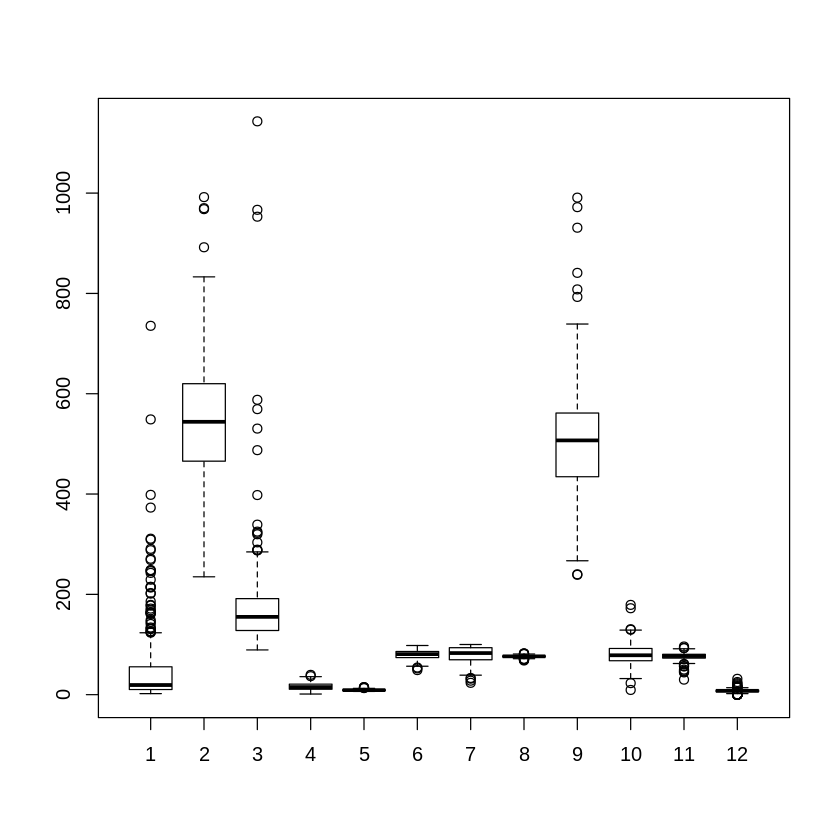

In [17]:
datos <- read.table("comunas.csv",sep=",",dec=".",header= TRUE)
dim(datos)
head(datos)
datos1 <- as.matrix(datos[1:323,3:14])
datos2 <- matrix(as.numeric(datos1),ncol=12,nrow=323,byrow=FALSE)
summary(datos2)
boxplot(datos2)

##### 2.1. Explique como se relacionan variables y observaciones en este último gráfico. Compare los resultados obtenidos utilizando la función predefinida en R prcomp con aquellos de los cálculos previos. 

R: Lo más notorio a simple vista es como el delito Rape está más concentrado en los estados de New York, Illinois, Colorado y Texas; el delito Murder está concentrado más en Georgia, Alaska, Alabama, Tenessi y Luissiana, y el delito Assault en Maryland y New Mexico.

Se puede apreciar el cómo se repiten los estados de Alaska, Luissiana, Tenessi, Alabama y Georgia en los delitos Murder y Assault. De esta manera, se ve fácilmente que existe una correlación positiva entre estos delitos.

##### 2.2. Explique a que corresponden cada una de las componente del objeto resultante de utilizar la función prcomp.

R: La función `prcomp` retorna las componentes sdev, rotation,, center, scale y x.

* **sdev**: Son las componentes principales de la desviación estándar.
* **rotation**: Es una matriz cuyas columnas contienen los eigenvectors.
* **center**: Contiene la media de los datos
* **scale**: Contiene la desviación estándar de los datos
* **x**: Contiene las coordenadas individuales de los datos

#### 2.3 Utilice la función predefinida en R princomp y compare con prcomp

In [31]:
pca_res_new <- princomp(USArrests, cor = TRUE)
names(pca_res_new)
pca_res_new$sdev
pca_res_new$center
pca_res_new$scale
pca_res_new$loadings
pca_res_new$n.obs
pca_res_new$scores

[1] "sdev"     "loadings" "center"   "scale"    "n.obs"    "scores"   "call"

Comp.1    Comp.2    Comp.3    Comp.4 
1.5748783 0.9948694 0.5971291 0.4164494

Murder  Assault UrbanPop     Rape 
   7.788  170.760   65.540   21.232

Murder   Assault  UrbanPop      Rape 
 4.311735 82.500075 14.329285  9.272248


Loadings:
         Comp.1 Comp.2 Comp.3 Comp.4
Murder    0.536  0.418  0.341  0.649
Assault   0.583  0.188  0.268 -0.743
UrbanPop  0.278 -0.873  0.378  0.134
Rape      0.543 -0.167 -0.818       

               Comp.1 Comp.2 Comp.3 Comp.4
SS loadings      1.00   1.00   1.00   1.00
Proportion Var   0.25   0.25   0.25   0.25
Cumulative Var   0.25   0.50   0.75   1.00

[1] 50

,Comp.1,Comp.2,Comp.3,Comp.4
Alabama,0.98556588,1.13339238,0.44426879,0.156267145
Alaska,1.95013775,1.07321326,-2.04000333,-0.438583440
Arizona,1.76316354,-0.74595678,-0.05478082,-0.834652924
Arkansas,-0.14142029,1.11979678,-0.11457369,-0.182810896
California,2.52398013,-1.54293399,-0.59855680,-0.341996478
Colorado,1.51456286,-0.98755509,-1.09500699,0.001464887
Connecticut,-1.35864746,-1.08892789,0.64325757,-0.118469414
Delaware,0.04770931,-0.32535892,0.71863294,-0.881977637
Florida,3.01304227,0.03922851,0.57682949,-0.096284752
Georgia,1.63928304,1.27894240,0.34246008,1.076796812


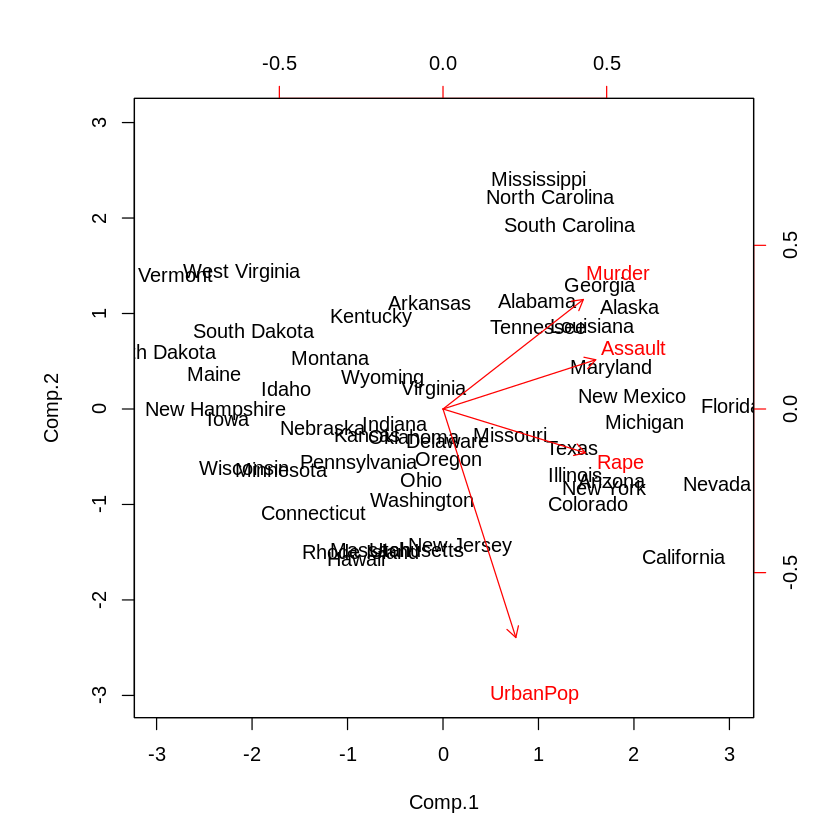

In [28]:
biplot(pca_res_new, scale = 0)

R: Lo primero que se logra apreciar, es que el gráfico mostrado es idéntico al visto por `prcomp` con la sutil diferencia de que está rotado.

La principal diferencia entre ambos es el método que se utiliza para calcular sus componentes. `princomp` calcula los valores utilizando una matriz de eigenvectors, mientas que `prcomp` utiliza una descomposición de los singular values.

#### Ejercicio 3: 
Considere los datos socio-económicos y de salud disponibles en el archivo "comunas.csv". Filtre los datos para analizar un grupo específico de comunas (al menos 30): por ejemplo sólo de 3 regiones, en un rango de número de habitantes, etc. 
1. Realice un Análisis de Componentes Principales para estos datos. 
2. Analice e interprete sus resultados

#### Bibliografía
* https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/prcomp
* https://rpubs.com/Joaquin_AR/287787
* https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/princomp